# Análise de dados do Airbnb

## Por Eugênio, Isabella, João, Julia e Rafael

* city: cidade da listagem (nossa variável)
* weekdays: retorna True se é dia da semana (e não fim de semana) (nossa variável)
* realSum: o preço de acomodação para duas pessoas por duas noites, em euros
* room_type: tipo de acomodação (quarto privado, quarto compartilhado ou casa inteira)
* room_shared: retorna True se o quarto for compartilhado
* room_private: retorna True se o quarto for privado
* person_capacity: número máximo de pessoas 
* host_is_superhost: retorna True se o anfitrião é um Superhost
* multi: retorna True se são oferecidos 2 a 4 quartos diferentes
* biz: retorna True se são oferecidos mais de 4 quartos diferentes
* cleanliness_rating: avaliação da limpeza
* guest_satisfaction_overall: nota geral da listagem
* bedrooms: número de quartos (0 para estúdios)
* dist: distância até o centro da cidade em km
* metro_dist: distância do metrô mais próximo em km
* attr_index: índice de atratividade da localização da listagem
* attr_index_norm: índice de atração normalizado (0-100)
* rest_index: índice de restaurantes da localização da listagem
* attr_index_norm: índice de restaurantes normalizado (0-100)
* lng: longitude da localização da listagem
* lat: latitude da localização da listagem

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
%matplotlib inline
import glob
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
#união de todos os arquivos (20 arquivos, dois para cada cidade - em dias da semana e fim de semana)
#criação de colunas para as cidades e para definir se é um dia da semana ou não
all_files = glob.glob('*.csv')

li = []

for filename in all_files:
    print(filename)
    df_temp = pd.read_csv(filename, index_col=0)
    df_temp["city"] = filename[:filename.index('_')]
    df_temp["weekdays"] = True if filename[filename.index('_')+1:filename.index('.')] == "weekdays" else False
    li.append(df_temp)

df = pd.concat(li, axis=0, ignore_index=True)
display(df)

amsterdam_weekdays.csv
amsterdam_weekends.csv
athens_weekdays.csv
athens_weekends.csv
barcelona_weekdays.csv
barcelona_weekends.csv
berlin_weekdays.csv
berlin_weekends.csv
budapest_weekdays.csv
budapest_weekends.csv
lisbon_weekdays.csv
lisbon_weekends.csv
london_weekdays.csv
london_weekends.csv
paris_weekdays.csv
paris_weekends.csv
rome_weekdays.csv
rome_weekends.csv
vienna_weekdays.csv
vienna_weekends.csv


,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,weekdays
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,True
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,True
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,True
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,True
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,715.938574,Entire home/apt,False,False,6.0,False,0,1,10.0,100.0,...,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,vienna,False
51703,304.793960,Entire home/apt,False,False,2.0,False,0,0,8.0,86.0,...,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,vienna,False
51704,637.168969,Entire home/apt,False,False,2.0,False,0,0,10.0,93.0,...,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,vienna,False
51705,301.054157,Private room,False,True,2.0,False,0,0,10.0,87.0,...,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,vienna,False


In [3]:
df = df[['city', 'weekdays', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat']]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   city                        51707 non-null  object 
 1   weekdays                    51707 non-null  bool   
 2   realSum                     51707 non-null  float64
 3   room_type                   51707 non-null  object 
 4   room_shared                 51707 non-null  bool   
 5   room_private                51707 non-null  bool   
 6   person_capacity             51707 non-null  float64
 7   host_is_superhost           51707 non-null  bool   
 8   multi                       51707 non-null  int64  
 9   biz                         51707 non-null  int64  
 10  cleanliness_rating          51707 non-null  float64
 11  guest_satisfaction_overall  51707 non-null  float64
 12  bedrooms                    51707 non-null  int64  
 13  dist                        517

In [5]:
df.head()

,city,weekdays,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,...,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,amsterdam,True,194.033698,Private room,False,True,2.0,False,1,0,...,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,amsterdam,True,344.245776,Private room,False,True,4.0,False,0,0,...,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,amsterdam,True,264.101422,Private room,False,True,2.0,False,0,1,...,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,amsterdam,True,433.529398,Private room,False,True,4.0,False,0,1,...,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,amsterdam,True,485.552926,Private room,False,True,2.0,True,0,0,...,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


In [6]:
df.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,3.161661,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128
std,327.948386,1.298545,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000
25%,148.752174,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510
50%,211.343089,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690
75%,319.694287,4.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410


In [7]:
df.shape

(51707, 21)

## Perguntas para análise

### Perguntas ligadas ao valor
* Qual é a média de preço por cidade?
    * Essa média muda dependendo do dia da semana?
* Qual é a média de avaliação por cidades?
    * Essa média muda dependendo do dia da semana?
* Qual é a relação entre o anfitrião ter muitas listagens, o valor e avaliação?
    * Como isso muda nas cidades e nos dias da semana?
* Até que ponto vale a pena pagar por limpeza?
* Quanto deve se gastar para ficar em uma boa localização (perto de restaurantes, perto do centro e perto de metrô)
* Qual é a melhor distância do centro para uma noa relação custo-benefício?
    * Como isso muda para cada cidade?
* Como se relacionam o preço, o status de superhost e a satisfação dos hóspedes?

### Perguntas não ligadas ao valor
* Qual é a relação entre limpeza e os tipos de quarto?
* Que tipo de imóveis costumam ser oferecidos por cidade?
* Algum tipo de casa tem maior nota de satisfação?
* Como é a distribuição espacial desses imóveis nas cidades?



<AxesSubplot: xlabel='realSum', ylabel='city'>

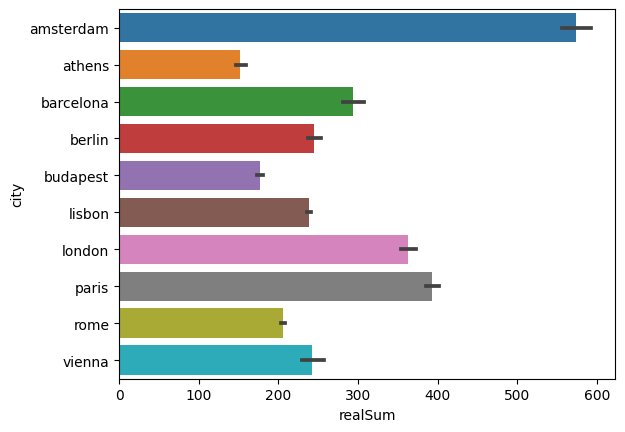

In [8]:
sns.barplot(df, x="realSum", y="city")

<AxesSubplot: >

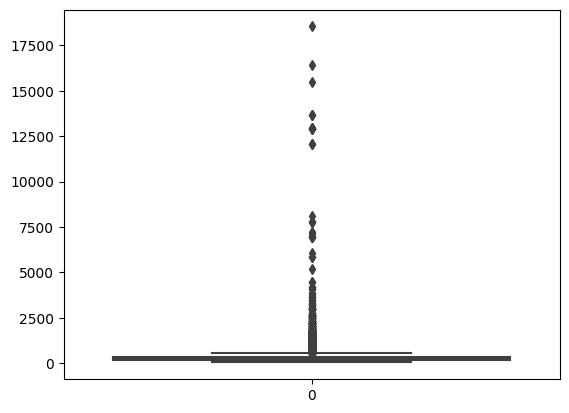

In [9]:
sns.boxplot(df["realSum"])

<AxesSubplot: xlabel='realSum', ylabel='city'>

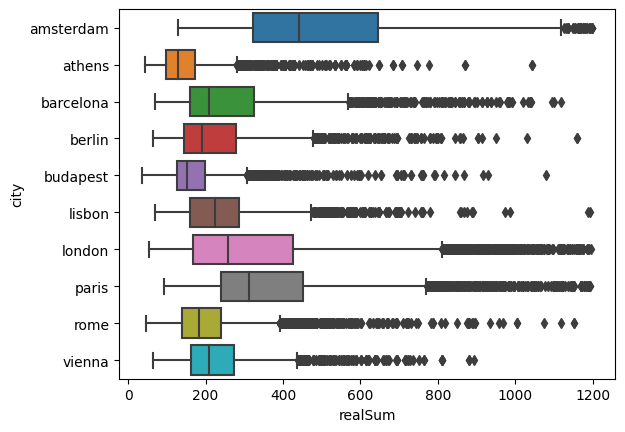

In [10]:
sns.boxplot(df[df["realSum"]<1200], x="realSum", y="city")

#muitos outliers!

<AxesSubplot: xlabel='realSum', ylabel='city'>

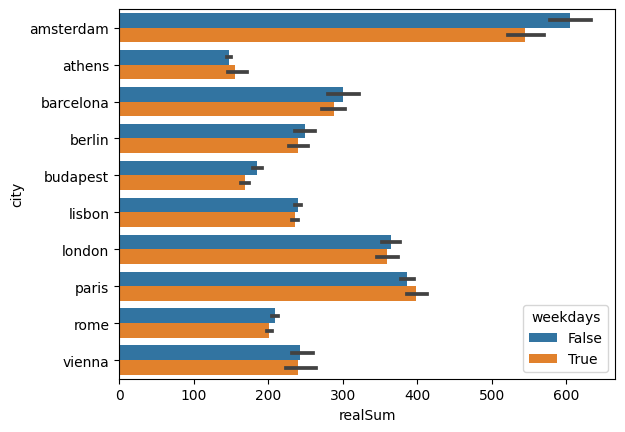

In [11]:
sns.barplot(df, x="realSum", y="city", hue="weekdays")

#conclusão: visite Atenas no fim de semana

In [12]:
#como quero analisar como a satisfação dos hóspedes (guest_satisfaction_overall) se relaciona com outras variáveis, decidi plotar as correlações
df.corr()

,weekdays,realSum,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
weekdays,1.000000,-0.012626,-0.000230,0.008639,0.010535,0.005892,0.004724,0.017661,-0.001495,-0.004596,0.010951,-0.012646,-0.000628,-0.002061,-0.015930,-0.003669,0.039496,0.016992,-0.019231
realSum,-0.012626,1.000000,-0.035095,-0.171949,0.203077,-0.045478,-0.052926,0.037144,-0.006082,-0.001888,0.221653,-0.044725,-0.061025,0.178228,0.292396,0.134722,0.144094,-0.173833,0.211805
room_shared,-0.000230,-0.035095,1.000000,-0.063533,0.035146,-0.027839,-0.016061,0.044406,-0.040097,-0.027876,-0.021365,0.014144,-0.002868,-0.031458,-0.006137,-0.031297,0.005711,-0.027829,0.023304
room_private,0.008639,-0.171949,-0.063533,1.000000,-0.499993,-0.049501,0.137026,-0.040198,-0.030983,-0.033401,-0.155889,0.213351,0.101981,-0.022286,0.029140,-0.022343,-0.136846,-0.201709,0.140762
person_capacity,0.010535,0.203077,0.035146,-0.499993,1.000000,0.031431,-0.054326,0.110668,0.003256,0.005181,0.560627,-0.128488,-0.037267,0.028394,-0.050487,0.037330,0.038059,0.146848,-0.168265
host_is_superhost,0.005892,-0.045478,-0.027839,-0.049501,0.031431,1.000000,0.097520,-0.108506,0.272376,0.280062,0.024250,-0.056113,-0.000722,-0.026335,-0.088949,-0.035060,-0.018348,0.185748,-0.113811
multi,0.004724,-0.052926,-0.016061,0.137026,-0.054326,0.097520,1.000000,-0.470725,0.041064,0.054254,-0.000659,0.033426,0.043365,0.006319,-0.041412,0.007051,-0.037402,0.041260,-0.034058
biz,0.017661,0.037144,0.044406,-0.040198,0.110668,-0.108506,-0.470725,1.000000,-0.107310,-0.208160,-0.026741,-0.164767,-0.109153,0.114732,0.093720,0.137747,0.083999,-0.088943,-0.126433
cleanliness_rating,-0.001495,-0.006082,-0.040097,-0.030983,0.003256,0.272376,0.041064,-0.107310,1.000000,0.714045,0.033489,-0.030202,0.010441,-0.025322,-0.075372,-0.031929,-0.005995,0.120379,-0.092502
guest_satisfaction_overall,-0.004596,-0.001888,-0.027876,-0.033401,0.005181,0.280062,0.054254,-0.208160,0.714045,1.000000,0.047573,-0.004178,0.029788,-0.050624,-0.074146,-0.069319,-0.008765,0.156079,-0.033957


<AxesSubplot: >

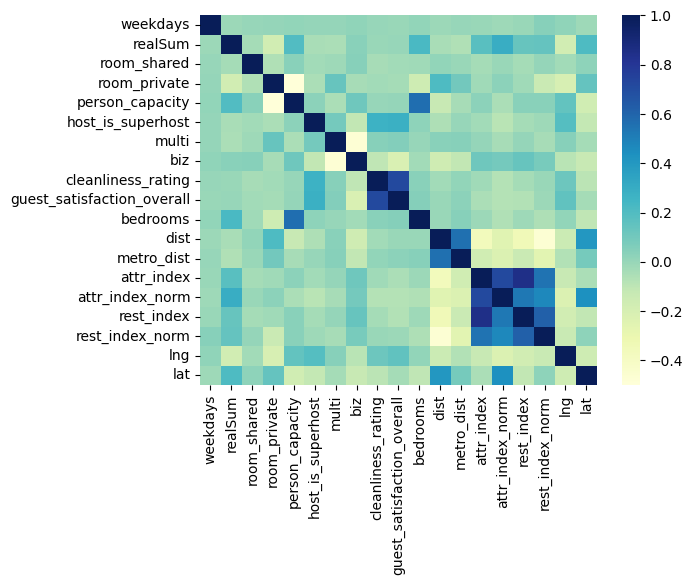

In [13]:
# A nota dada para limpeza é proporcional a nota de satisfação
# 
sns.heatmap(df.corr(), cmap="YlGnBu")

<AxesSubplot: xlabel='cleanliness_rating', ylabel='guest_satisfaction_overall'>

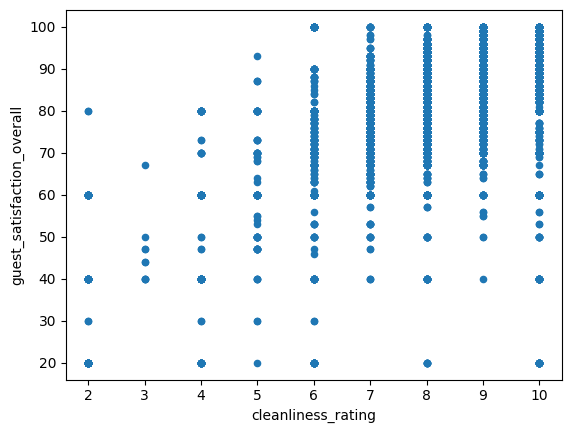

In [14]:
#percebi que a maior correlação parecia estar entre guest_satisfaction_overall e cleanliness_rating
df.plot(x="cleanliness_rating", y="guest_satisfaction_overall", kind="scatter",)
#ainda tem que arrumar (colcocar título etc)
#estou pensando em remover os outliers e ver o que acontece

<AxesSubplot: xlabel='guest_satisfaction_overall'>

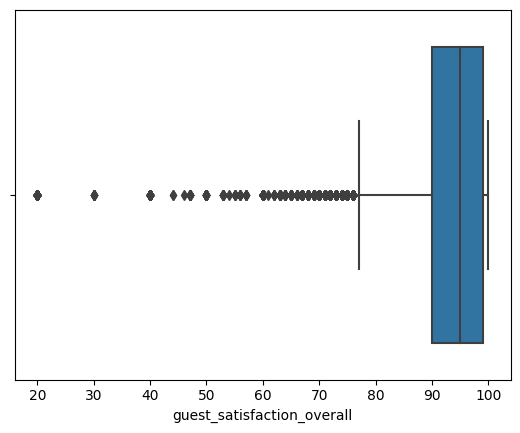

In [15]:
#sns.boxplot(df[df["guest_satisfaction_overall"]>30], x="guest_satisfaction_overall")
sns.boxplot(df, x="guest_satisfaction_overall")

<AxesSubplot: xlabel='cleanliness_rating'>

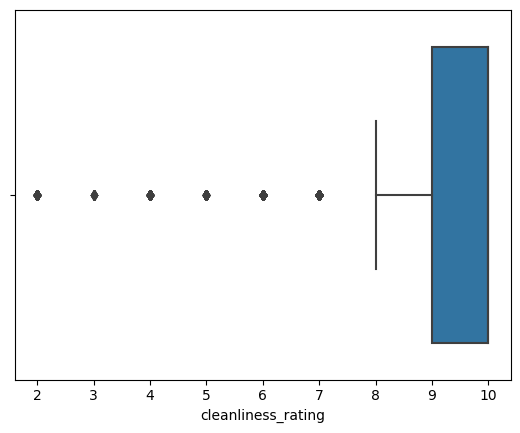

In [16]:
#sns.boxplot(df[df["cleanliness_rating"]>30], x="cleanliness_rating")
sns.boxplot(df, x="cleanliness_rating")

<AxesSubplot: xlabel='cleanliness_rating', ylabel='guest_satisfaction_overall'>

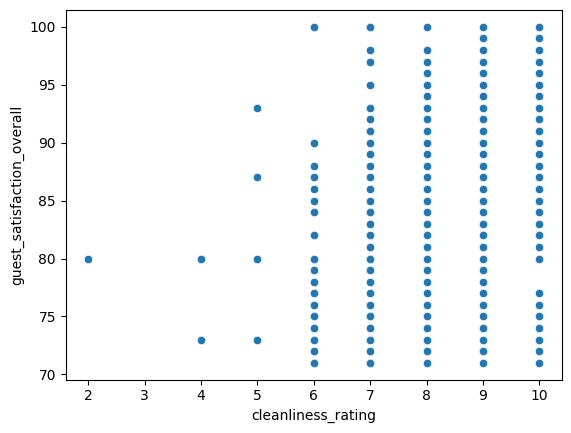

In [17]:
sns.scatterplot(df[df["guest_satisfaction_overall"]>70], x="cleanliness_rating", y="guest_satisfaction_overall")

<AxesSubplot: xlabel='guest_satisfaction_overall', ylabel='city'>

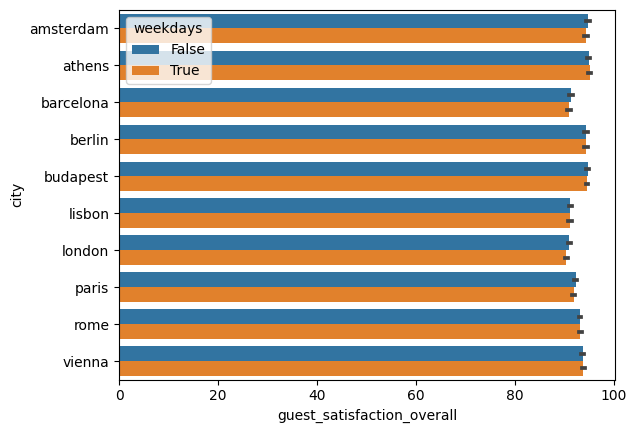

In [18]:
sns.barplot(df, x="guest_satisfaction_overall", y="city", hue="weekdays")

<AxesSubplot: xlabel='guest_satisfaction_overall', ylabel='city'>

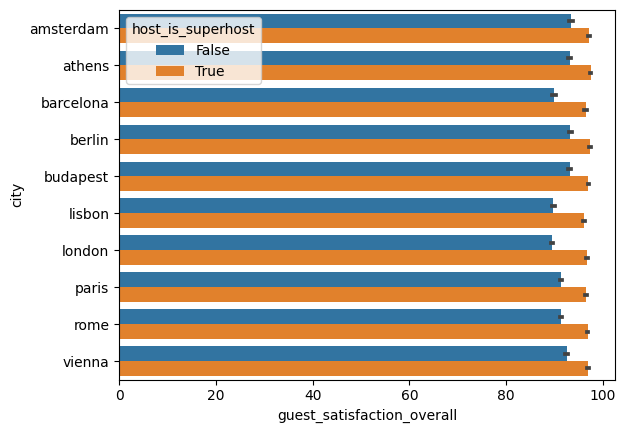

In [19]:
sns.barplot(df, x="guest_satisfaction_overall", y="city", hue="host_is_superhost")

<AxesSubplot: xlabel='guest_satisfaction_overall', ylabel='city'>

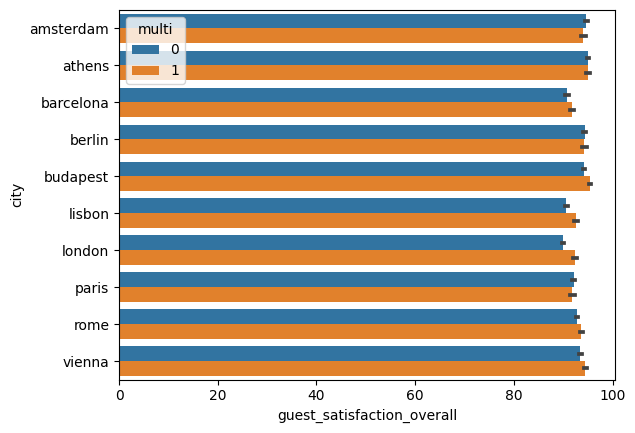

In [20]:
sns.barplot(df, x="guest_satisfaction_overall", y="city", hue="multi")

<AxesSubplot: xlabel='guest_satisfaction_overall', ylabel='city'>

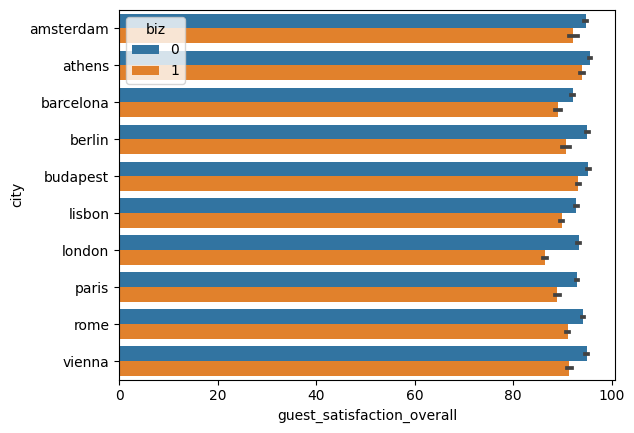

In [21]:
sns.barplot(df, x="guest_satisfaction_overall", y="city", hue="biz")

In [30]:
df2 = df.copy()

In [31]:
df2

,city,weekdays,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,...,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,amsterdam,True,194.033698,Private room,False,True,2.0,False,1,0,...,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,amsterdam,True,344.245776,Private room,False,True,4.0,False,0,0,...,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,amsterdam,True,264.101422,Private room,False,True,2.0,False,0,1,...,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,amsterdam,True,433.529398,Private room,False,True,4.0,False,0,1,...,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,amsterdam,True,485.552926,Private room,False,True,2.0,True,0,0,...,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,vienna,False,715.938574,Entire home/apt,False,False,6.0,False,0,1,...,100.0,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136
51703,vienna,False,304.793960,Entire home/apt,False,False,2.0,False,0,0,...,86.0,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296
51704,vienna,False,637.168969,Entire home/apt,False,False,2.0,False,0,0,...,93.0,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460
51705,vienna,False,301.054157,Private room,False,True,2.0,False,0,0,...,87.0,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200


In [43]:
def checa_tipo(row):
    if row['host_is_superhost'] == False and row['biz'] == False and row['multi'] == False:
        valor=0
    elif row['host_is_superhost'] == False and row['biz'] == False and row['multi'] == True:
        valor=1
    elif row['host_is_superhost'] == False and row['biz'] == True and row['multi'] == False:
        valor=2
    elif row['host_is_superhost'] == True and row['biz'] == False and row['multi'] == False:
        valor=3
    elif row['host_is_superhost'] == True and row['biz'] == False and row['multi'] == True:
        valor=4
    elif row['host_is_superhost'] == True and row['biz'] == True and row['multi'] == False:
        valor=5
    return pd.Series(valor)
    

In [44]:
df2['cat'] = df2.apply(checa_tipo, axis=1)
df2   

,city,weekdays,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,...,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,cat
0,amsterdam,True,194.033698,Private room,False,True,2.0,False,1,0,...,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,1
1,amsterdam,True,344.245776,Private room,False,True,4.0,False,0,0,...,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,0
2,amsterdam,True,264.101422,Private room,False,True,2.0,False,0,1,...,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,2
3,amsterdam,True,433.529398,Private room,False,True,4.0,False,0,1,...,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,2
4,amsterdam,True,485.552926,Private room,False,True,2.0,True,0,0,...,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,vienna,False,715.938574,Entire home/apt,False,False,6.0,False,0,1,...,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,2
51703,vienna,False,304.793960,Entire home/apt,False,False,2.0,False,0,0,...,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,0
51704,vienna,False,637.168969,Entire home/apt,False,False,2.0,False,0,0,...,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,0
51705,vienna,False,301.054157,Private room,False,True,2.0,False,0,0,...,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,0


<AxesSubplot: xlabel='cat', ylabel='guest_satisfaction_overall'>

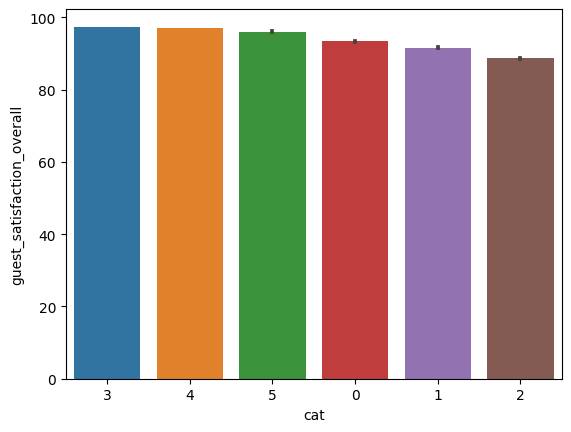

In [48]:
sns.barplot(df2, x="cat", y="guest_satisfaction_overall", order=df2.groupby('cat').mean().sort_values('guest_satisfaction_overall', ascending=False).index)